# Carregando os dados

In [1]:
# Fazendo o download dos dados do Kaggle
import kagglehub

url = kagglehub.dataset_download("unclesamulus/blood-cells-image-dataset")

print("Path to dataset files:", url)

# Definindo os diretórios
import pathlib
data_dir = pathlib.Path(url) / 'bloodcells_dataset'
print(data_dir)

100%|██████████| 268M/268M [00:02<00:00, 96.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2
/root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2/bloodcells_dataset


In [2]:
# Visualizar o número de arquivos com a extensão .jpg no meu diretório.

len(list(data_dir.glob('*/*.[jJ][pP][gG]')))

17092

In [3]:
# Exibindo as pastas dentro do meu diretório utilizando um list comprehension.
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['lymphocyte',
 'neutrophil',
 'erythroblast',
 'monocyte',
 'ig',
 'eosinophil',
 'platelet',
 'basophil']

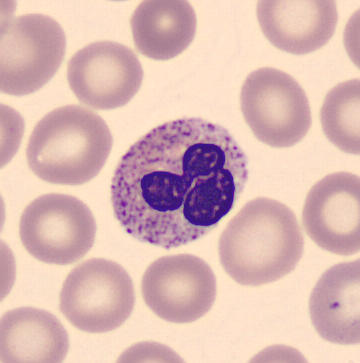

In [4]:
# Visualizando uma imagem de um subdiretório:
import PIL # Importando a biblioteca PIL

neutrophil = list(data_dir.glob('neutrophil/*'))
PIL.Image.open(str(neutrophil[0]))

# Explorando e visualizando os dados

In [5]:
import numpy as np

for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.[jJ][pP][gG]'))
  print(f'O {subfolder} tem {len(images)} imagens.') # Identificando o número de imagens dentro de cada subdiretório.

  if images: # Identificando as dimensões das primeiras imagens dentro de cada um dos subdiretórios.
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f'A primeira imagem do {subfolder} tem dimensão {img_array.shape}.')
    # Imprime as dimensões altura (pixels) x largura (pixels) x nº canais

O lymphocyte tem 1214 imagens.
A primeira imagem do lymphocyte tem dimensão (363, 360, 3).
O neutrophil tem 3329 imagens.
A primeira imagem do neutrophil tem dimensão (363, 360, 3).
O erythroblast tem 1551 imagens.
A primeira imagem do erythroblast tem dimensão (363, 360, 3).
O monocyte tem 1420 imagens.
A primeira imagem do monocyte tem dimensão (363, 360, 3).
O ig tem 2895 imagens.
A primeira imagem do ig tem dimensão (363, 360, 3).
O eosinophil tem 3117 imagens.
A primeira imagem do eosinophil tem dimensão (363, 360, 3).
O platelet tem 2348 imagens.
A primeira imagem do platelet tem dimensão (363, 360, 3).
O basophil tem 1218 imagens.
A primeira imagem do basophil tem dimensão (363, 360, 3).


# Carregando os dados com TensorFlow e dividindo os grupos em treino e validação

In [6]:
import tensorflow as tf

In [7]:
batch_size = 32
altura = 256
largura = 256

In [8]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir, # Definindo o diretório com as imagens
    validation_split = 0.2, # Reservando 20% das imagens para validação
    subset = 'training', # Definindo o subgrupo treino
    label_mode = 'categorical', # Definindo o formato das labels como categóricas
    seed = 123, # Fixando uma seed para reprodutibilidade dos resultados
    image_size = (altura, largura), # Definindo os tamanhos das imagens
    batch_size = batch_size # Definindo os tamanhos dos batches para importação
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [9]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'categorical',
    seed = 123,
    image_size = (altura, largura),
    batch_size = batch_size
)

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [10]:
treino.class_names

['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

# Montando um modelo de perceptron de múltiplas camadas

In [11]:
tf.random.set_seed(123123)

In [12]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (altura, largura, 3)),# Definindo os shapes das entradas
    tf.keras.layers.Rescaling(1./255), # Normalizando os dados
    tf.keras.layers.Flatten(), # Transformando a imagem em um vetor
    # Definindo as camadas
    tf.keras.layers.Dense(128, activation = 'relu'), # Camada oculta
    tf.keras.layers.Dense(8, activation='softmax') # Camada de saída
])

In [13]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Treinando o modelo

In [14]:
history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=10
)

Epoch 1/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.2837 - loss: 39.4254 - val_accuracy: 0.4251 - val_loss: 2.3622
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.2296 - loss: 2.0298 - val_accuracy: 0.3256 - val_loss: 1.7451
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.3194 - loss: 1.7101 - val_accuracy: 0.3013 - val_loss: 1.6420
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.3144 - loss: 1.6426 - val_accuracy: 0.2317 - val_loss: 1.7204
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.3198 - loss: 1.6187 - val_accuracy: 0.3075 - val_loss: 1.5621
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.2833 - loss: 1.7409 - val_accuracy: 0.1893 - val_loss: 2.0595
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 0.1985 - loss: 2.0491 - val_accuracy: 0.1893 - val_loss: 2.0241
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.1989 - loss: 2.0203 -

In [15]:
history.history

{'accuracy': [0.35424894094467163,
  0.27614450454711914,
  0.3191458284854889,
  0.31856077909469604,
  0.3219248354434967,
  0.2346789538860321,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093,
  0.1961386501789093],
 'loss': [15.187339782714844,
  1.8513644933700562,
  1.6823192834854126,
  1.6271504163742065,
  1.602841854095459,
  1.9311305284500122,
  2.045917510986328,
  2.020814895629883,
  2.0098392963409424,
  2.00588059425354],
 'val_accuracy': [0.4251024127006531,
  0.32562902569770813,
  0.3013458251953125,
  0.23171445727348328,
  0.3074897527694702,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973,
  0.18929198384284973],
 'val_loss': [2.3621578216552734,
  1.745051622390747,
  1.641972303390503,
  1.7204302549362183,
  1.5621342658996582,
  2.0595059394836426,
  2.024108648300171,
  2.007347583770752,
  2.000905752182007,
  1.9987512826919556]}

In [16]:
import matplotlib.pyplot as plt

def accuracy_loss(history, epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)

  plt.figure(figsize = (12, 6))
  plt.subplot(1,2,1)
  plt.plot(intervalo_epocas, acc, 'blue', label = 'Acurácia de treino')
  plt.plot(intervalo_epocas, val_acc, 'red', label = 'Acurácia de validação')
  plt.title('Acurácia de treino e validação')
  plt.legend(loc = 'best')

  plt.subplot(1,2,2)
  plt.plot(intervalo_epocas, loss, 'blue', label = 'Erro de treino')
  plt.plot(intervalo_epocas, val_loss, 'red', label = 'Erro de validação')
  plt.title('Erro de treino e validação')
  plt.legend(loc = 'best')

  plt.show()

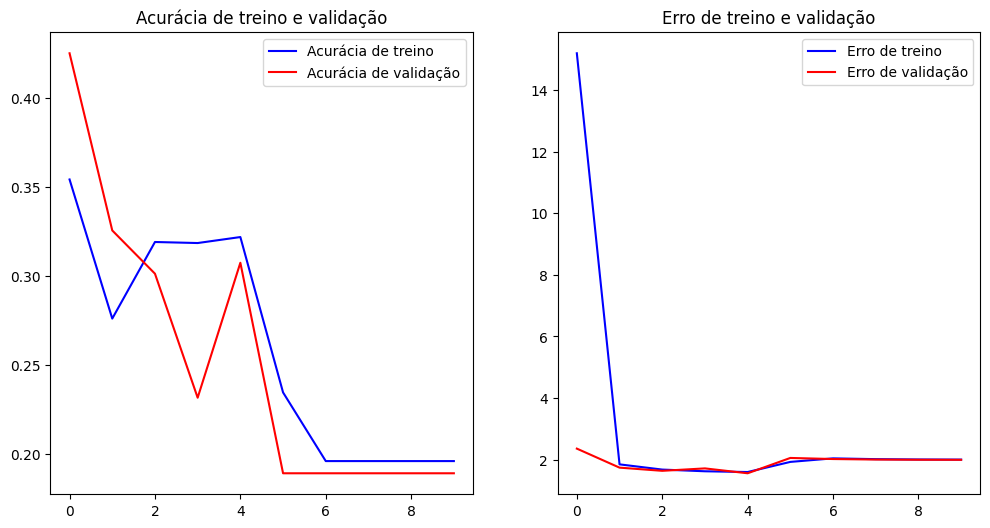

In [17]:
accuracy_loss(history, 10)

In [18]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,500,954 (288.01 MB)

 Trainable params: 25,166,984 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,333,970 (192.01 MB)

# Aperfeiçoando o modelo

In [19]:
# Adicionando camadas convolucionais para aperfeiçoar o modelo

modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(altura, largura, 3)),  # Dimensões de entrada
    tf.keras.layers.Rescaling(1./255),  # Normalização
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduz a dimensão para um vetor fixo
    tf.keras.layers.Dense(64, activation='relu'),  # Camada oculta
    tf.keras.layers.Dense(8, activation='softmax')  # Camada de saída
])

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [20]:
# Aumentando o número de épocas para 15
epocas = 15

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocas
)

Epoch 1/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 50s 95ms/step - accuracy: 0.2643 - loss: 1.8622 - val_accuracy: 0.5091 - val_loss: 1.3011
Epoch 2/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.5274 - loss: 1.2493 - val_accuracy: 0.5816 - val_loss: 1.1582
Epoch 3/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.6029 - loss: 1.0745 - val_accuracy: 0.6311 - val_loss: 0.9304
Epoch 4/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.6513 - loss: 0.8923 - val_accuracy: 0.6750 - val_loss: 0.8478
Epoch 5/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.6810 - loss: 0.8077 - val_accuracy: 0.7092 - val_loss: 0.7724
Epoch 6/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.6917 - loss: 0.7864 - val_accuracy: 0.6791 - val_loss: 0.7781
Epoch 7/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.7186 - loss: 0.7293 - val_accuracy: 0.7118 - val_loss: 0.7652
Epoch 8/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.7341 - loss: 0.6865 - 

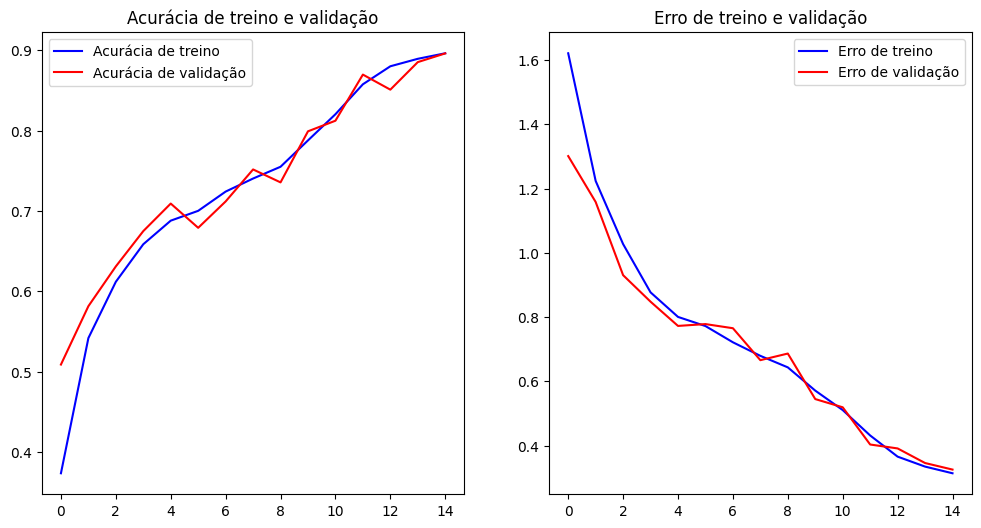

In [21]:
accuracy_loss(history, epocas)

In [22]:
# Aumentando o número de épocas para 50

epocas2 = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocas2
)

Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.8973 - loss: 0.3057 - val_accuracy: 0.9172 - val_loss: 0.2678
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9038 - loss: 0.2782 - val_accuracy: 0.8830 - val_loss: 0.3349
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9049 - loss: 0.2758 - val_accuracy: 0.9081 - val_loss: 0.2890
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9151 - loss: 0.2533 - val_accuracy: 0.9251 - val_loss: 0.2428
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.9256 - loss: 0.2277 - val_accuracy: 0.9345 - val_loss: 0.2152
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.9224 - loss: 0.2311 - val_accuracy: 0.9389 - val_loss: 0.2128
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9250 - loss: 0.2226 - val_accuracy: 0.9075 - val_loss: 0.2759
Epoch 8/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.9287 - loss: 0.2137 - 

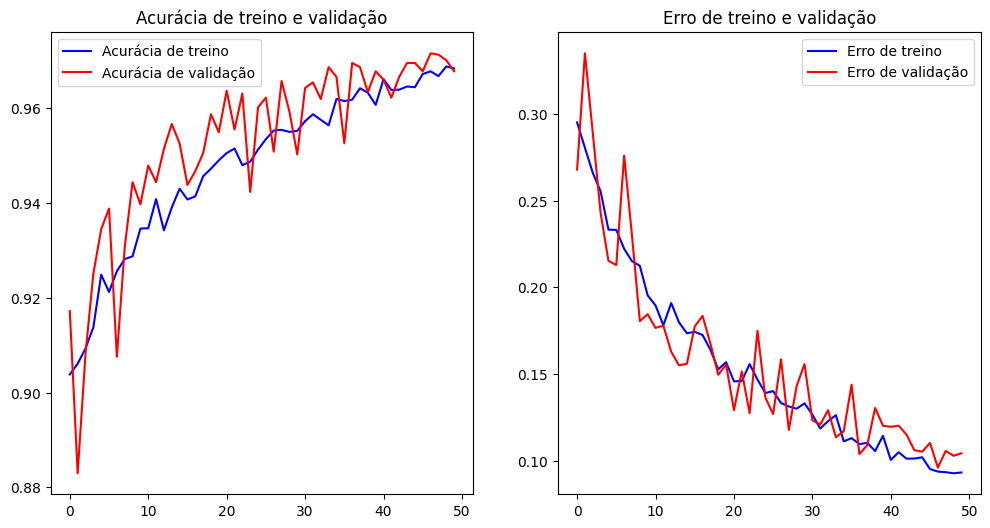

In [23]:
accuracy_loss(history, epocas2)

In [24]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,074 (1.17 MB)

 Trainable params: 102,024 (398.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204,050 (797.07 KB)

# Aumentando a diversidade do dataset - Data augmentation

In [25]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.5),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.2)
])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

modelo = tf.keras.models.Sequential([
    # Aumentando a diversidade dos dados
    data_augmentation,

    # Normalização
    tf.keras.layers.Rescaling(1./255),

    # Adicionando camadas convolucionais e pooling
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                           input_shape = (altura, largura, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.3),  # Dropout para reduzir overfitting
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    # Reduzindo as dimensões do vetor para um valor fixo
    tf.keras.layers.GlobalAveragePooling2D(),

    # Camadas de saída
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Dropout para reduzir overfitting
    tf.keras.layers.Dense(8, activation='softmax')
])

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Ajuste para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Ajustando o modelo após o aumento dos dados

epocas2 = 70


history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs = epocas2)

Epoch 1/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 66s 134ms/step - accuracy: 0.2092 - loss: 1.9666 - val_accuracy: 0.1840 - val_loss: 2.0933
Epoch 2/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 72s 126ms/step - accuracy: 0.4235 - loss: 1.4834 - val_accuracy: 0.3473 - val_loss: 1.5411
Epoch 3/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 55s 127ms/step - accuracy: 0.4847 - loss: 1.3286 - val_accuracy: 0.5787 - val_loss: 1.2206
Epoch 4/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 56s 130ms/step - accuracy: 0.5463 - loss: 1.1731 - val_accuracy: 0.6533 - val_loss: 0.8741
Epoch 5/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.6461 - loss: 0.9043 - val_accuracy: 0.6498 - val_loss: 0.8699
Epoch 6/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 81s 128ms/step - accuracy: 0.6772 - loss: 0.8241 - val_accuracy: 0.7308 - val_loss: 0.6774
Epoch 7/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 55s 129ms/step - accuracy: 0.7087 - loss: 0.7336 - val_accuracy: 0.7253 - val_loss: 0.7119
Epoch 8/70
428/428 ━━━━━━━━━━━━━━━━━━━━ 56s 130ms/step - accuracy: 0.7248 - loss: 0

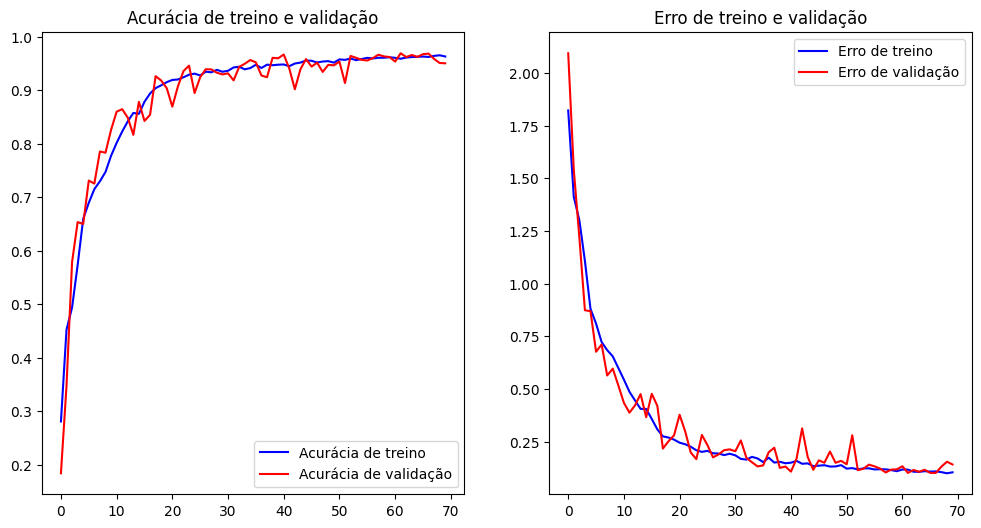

In [28]:
accuracy_loss(history, epocas2)

In [29]:
# Salvando o modelo
modelo.save('modelo_final.keras')

# Testando o modelo com uma nova imagem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


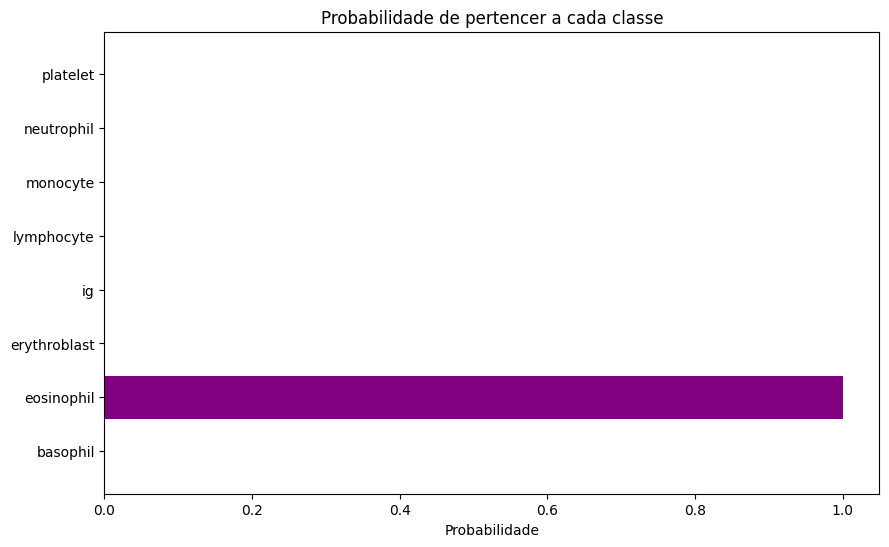

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Carregar o modelo salvo
modelo = tf.keras.models.load_model('modelo_final.keras')

# URL imagem:
caminho_imagem = '/content/drive/MyDrive/Colab Notebooks/Introdução à ciência de dados/projeto_disciplina/imagens_teste/eosinophil-2.jpg'

# Carregamento e processamento da imagem
img = image.load_img(caminho_imagem, target_size=(256, 256))  # Defina o tamanho da imagem de acordo com o modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão para o batch


# Previsão
previsao = modelo.predict(img_array)

# Probabilidades para cada classe
probabilidades = previsao[0]

# Nome das classes
classes = treino.class_names

# Gráfico de barras com as probabilidades
plt.figure(figsize=(10, 6))
plt.barh(classes, probabilidades, color='purple')
plt.xlabel('Probabilidade')
plt.title('Probabilidade de pertencer a cada classe')
plt.show()
